In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [2]:
# Teledoc
tdoc = pdr.get_data_yahoo('TDOC','2019-05-31')
tdoc.drop('Adj Close', axis=1, inplace=True)
tdoc.head()

High        Low       Open      Close   Volume
Date                                                           
2019-05-30  59.369999  57.410000  58.500000  58.099998  1035300
2019-05-31  58.900002  56.150002  57.099998  58.119999   627000
2019-06-03  58.000000  53.459999  58.000000  53.980000  2052300
2019-06-04  55.919998  53.820000  54.500000  55.750000  1825900
2019-06-05  56.500000  53.880001  56.450001  55.139999   943400

In [3]:
tdoc['3-day'] = tdoc['Close'].rolling(3).mean()
tdoc['9-day'] = tdoc['Close'].rolling(9).mean()
tdoc['21-day'] = tdoc['Close'].rolling(21).mean()
tdoc['Change'] = np.log(tdoc.Close / tdoc.Close.shift())
tdoc.tail()

High         Low        Open       Close   Volume  \
Date                                                                  
2021-05-27  149.414993  144.100006  148.320007  149.000000  3811400   
2021-05-28  156.710007  150.240005  150.869995  150.580002  3100800   
2021-06-01  156.270004  150.389999  153.869995  152.360001  2722600   
2021-06-02  154.445007  151.059998  151.300003  152.740005  1900900   
2021-06-03  152.509995  146.009995  151.490005  146.589996  2722164   

                 3-day       9-day      21-day    Change  
Date                                                      
2021-05-27  147.260005  142.175557  147.790953  0.004574  
2021-05-28  149.300003  143.644446  146.825239  0.010548  
2021-06-01  150.646667  145.085558  145.873334  0.011752  
2021-06-02  151.893336  146.844447  145.374762  0.002491  
2021-06-03  150.563334  147.433336  144.813810 -0.041098

In [4]:
tdoc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-05-30 to 2021-06-03
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    508 non-null    float64
 1   Low     508 non-null    float64
 2   Open    508 non-null    float64
 3   Close   508 non-null    float64
 4   Volume  508 non-null    int64  
 5   3-day   506 non-null    float64
 6   9-day   500 non-null    float64
 7   21-day  488 non-null    float64
 8   Change  507 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 39.7 KB


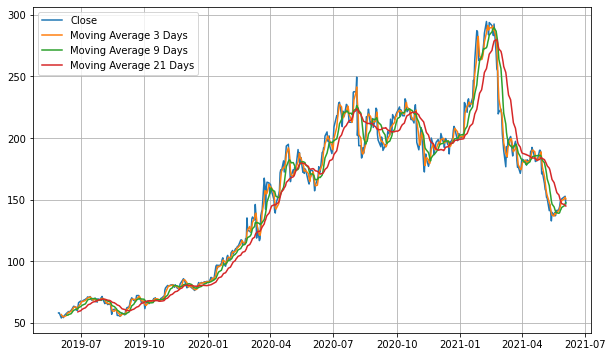

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'],label='Close')
plt.plot(tdoc['3-day'],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on 2019

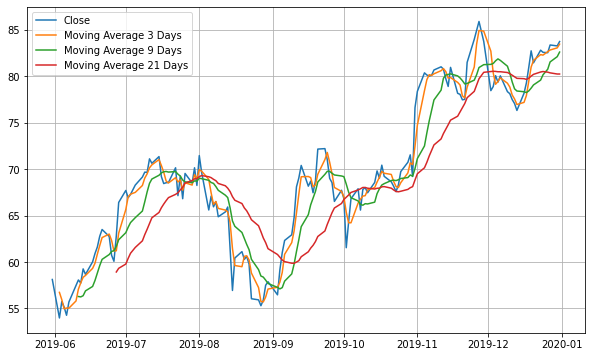

In [24]:
start='20190531'
end= '20200101'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)

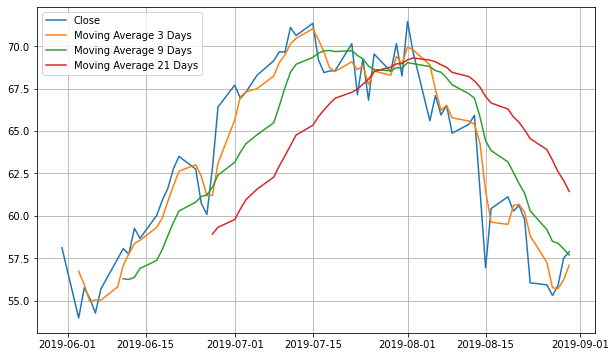

In [31]:
start='20190531'
end= '20190831'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)

## 2020 First Half

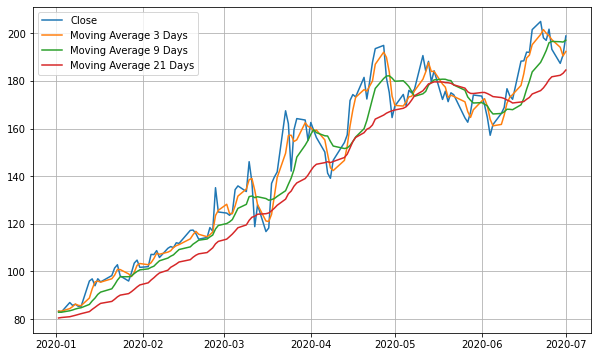

In [25]:
start='20200101'
end= '20200701'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:end],label='Close')
plt.plot(tdoc['3-day'][start:end],label='Moving Average 3 Days')
plt.plot(tdoc['9-day'][start:end],label='Moving Average 9 Days')
plt.plot(tdoc['21-day'][start:end],label='Moving Average 21 Days')
plt.legend(loc=2)

In [10]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_1'] = np.where(tdoc['9-day'] > tdoc['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_1'] = np.where(tdoc['9-day'] < tdoc['21-day'],-1,tdoc['position_1'])

<AxesSubplot:xlabel='Date'>

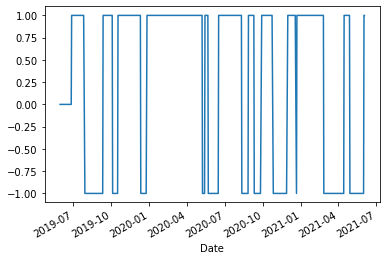

In [11]:
tdoc['position_1'].plot()

<AxesSubplot:xlabel='Date'>

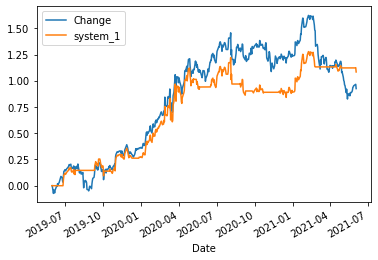

In [12]:
# Whether we are making money with this system
tdoc['system_1'] = np.where(tdoc['position_1'] > 0, tdoc['position_1']* tdoc['Change'],0)
tdoc[['Change','system_1']].cumsum().plot()

In [13]:
# When the faster moving average is moving above the slower one, indicates time to buy
tdoc['position_2'] = np.where(tdoc['3-day'] > tdoc['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
tdoc['position_2'] = np.where(tdoc['3-day'] < tdoc['9-day'],-1,tdoc['position_2'])


<AxesSubplot:xlabel='Date'>

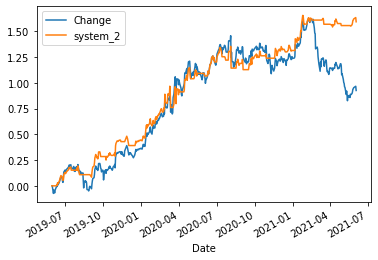

In [14]:
# Whether we are making money with this system
tdoc['system_2'] = np.where(tdoc['position_2'] > 0, tdoc['position_2']* tdoc['Change'],0)
tdoc[['Change','system_2']].cumsum().plot()

<AxesSubplot:xlabel='Date'>

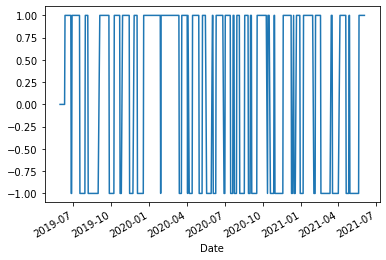

In [15]:
tdoc['position_2'].plot()

In [16]:
tdoc['position_2'].diff()[tdoc['position_2'].diff() != 0].index.values

array(['2019-05-30T00:00:00.000000000', '2019-06-11T00:00:00.000000000',
       '2019-06-26T00:00:00.000000000', '2019-06-28T00:00:00.000000000',
       '2019-07-17T00:00:00.000000000', '2019-07-30T00:00:00.000000000',
       '2019-08-06T00:00:00.000000000', '2019-09-03T00:00:00.000000000',
       '2019-09-26T00:00:00.000000000', '2019-10-08T00:00:00.000000000',
       '2019-10-22T00:00:00.000000000', '2019-10-28T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-12-18T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-04-02T00:00:00.000000000', '2020-04-03T00:00:00.000000000',
       '2020-04-06T00:00:00.000000000', '2020-04-14T00:00:00.000000000',
       '2020-04-30T00:00:00.000000000', '2020-05-08T00:00:00.000000000',
       '2020-05-18T00:00:00.000000000', '2020-06-01

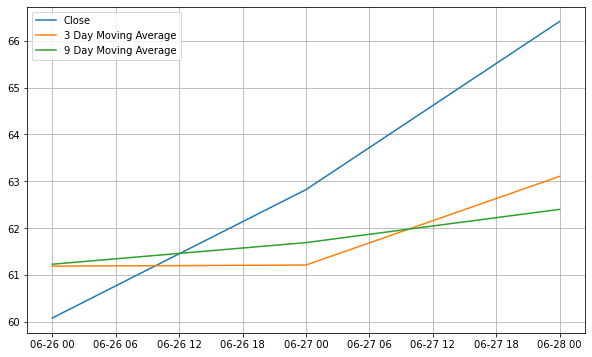

In [17]:
start = '2019-06-26'
finish = '2019-06-28'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tdoc['Close'][start:finish],label='Close')
plt.plot(tdoc['3-day'][start:finish],label='3 Day Moving Average')
plt.plot(tdoc['9-day'][start:finish],label='9 Day Moving Average')
plt.legend(loc=2)

## Calculate the Volitility

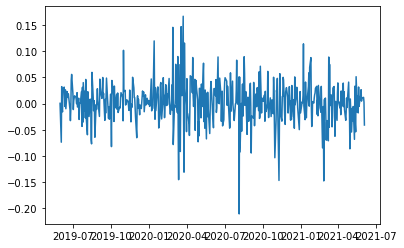

In [18]:
plt.plot(tdoc.Change)

In [19]:
tdoc['Volatility'] = tdoc.Change.rolling(21).std().shift()

<AxesSubplot:xlabel='Date'>

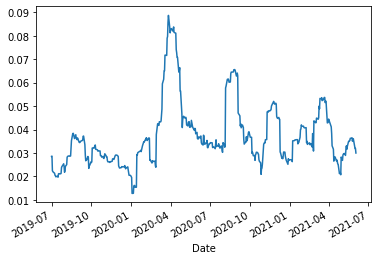

In [20]:
tdoc.Volatility.plot()